In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the dataset

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/GC ml hackathon/training_set.csv")

x=dataset.iloc[:,2:-1].values
y=dataset.iloc[:,-1].values

In [4]:
x.shape

(227845, 29)

In [5]:
dataset = dataset.drop(['buffer'], axis = 1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  int64  
 1   P1      227845 non-null  float64
 2   P2      227845 non-null  float64
 3   P3      227845 non-null  float64
 4   P4      227845 non-null  float64
 5   P5      227845 non-null  float64
 6   P6      227845 non-null  float64
 7   P7      227845 non-null  float64
 8   P8      227845 non-null  float64
 9   P9      227845 non-null  float64
 10  P10     227845 non-null  float64
 11  P11     227845 non-null  float64
 12  P12     227845 non-null  float64
 13  P13     227845 non-null  float64
 14  P14     227845 non-null  float64
 15  P15     227845 non-null  float64
 16  P16     227845 non-null  float64
 17  P17     227845 non-null  float64
 18  P18     227845 non-null  float64
 19  P19     227845 non-null  float64
 20  P20     227845 non-null  float64
 21  P21     22

As there are no missing values and all are in the datatype of either float64 and int64 we dont need to think about missing values and label encoding or one hot encoding (As there are no catergorial or object datatypes)

In [7]:
dataset.head(10)

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
0,134454,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,0.474746,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,21.90,0
1,78980,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,-0.466060,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,2.99,0
2,55273,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,-0.982280,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,7.08,0
3,36417,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,0.258104,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,7.68,0
4,154977,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,0.980549,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,49.00,0
5,67706,-1.204396,0.895136,1.416752,-1.515809,-0.232933,-0.278645,0.470024,0.291977,0.256230,...,-0.094880,-0.079252,0.038514,0.017078,-0.360650,0.748521,0.510475,0.259724,30.00,0
6,51705,1.174498,0.363603,-0.213642,0.874376,0.561873,-0.105249,0.505197,-0.178866,-0.364710,...,-0.371282,-1.095817,0.010938,-0.791478,0.473820,-0.669108,0.019495,0.023306,52.05,0
7,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0
8,159573,2.008964,-0.026310,-1.837550,0.313541,0.272992,-0.816407,-0.017404,-0.074550,0.323780,...,0.202899,0.554954,0.058351,0.694446,0.000615,0.627712,-0.083553,-0.045078,16.07,0
9,19901,1.337836,-0.587493,0.724083,-0.300644,-1.207252,-0.605452,-0.840063,-0.033971,0.788198,...,-0.123340,-0.122951,0.008669,0.461695,0.427552,-0.307951,-0.025863,-0.004419,10.00,0


In [8]:
dataset['Class'].sum()

400

In [9]:
for col in dataset:
    print(f'{col}: {dataset[col].unique()}')


Time: [134454  78980  55273 ... 139712  42964  42853]
P1: [ 1.99738662 -0.85182304  1.11996283 ...  0.02057785  1.15162816
  1.92249746]
P2: [ 0.02863075  1.44607049  0.5460548  ... -0.30060018 -0.01172861
 -0.46416262]
P3: [-1.88504708  0.67975938  0.87785555 ...  0.51596431  1.19277978
  0.1475083 ]
P4: [ 0.34123406  0.00797332  2.41583278 ... -2.42356968  1.13558685
  0.34305528]
P5: [ 0.35026254  0.61780121 -0.28255398 ...  0.219863   -0.69428712
 -0.66568411]
P6: [-0.90029741 -1.21069503 -0.33636581 ...  0.17617976  0.3253029
  0.35575   ]
P7: [ 0.11935187  1.36963682  0.01874691 ... -0.10892754 -0.63714433
 -1.11752469]
P8: [-0.15774643 -0.44298526  0.04213506 ...  0.13181585  0.22368309
  0.18561354]
P9: [ 0.47474587 -0.46606005 -0.9822802  ... -0.88327916  0.55415902
  2.33486871]
P10: [-0.29622776 -0.01877438  0.84328598 ...  0.05485735 -0.04773753
 -0.24925436]
P11: [ 0.90851755 -0.52503042  1.3666721  ...  0.3085199   0.72914782
  1.89223692]
P12: [ 0.22124002  0.13662876  0

### Outlier Removal

364.89599999999973
0.92


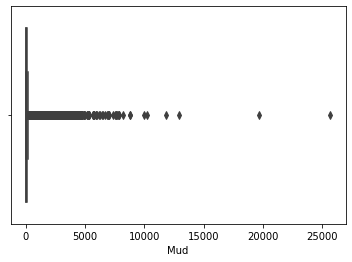

In [10]:
max_thresold = dataset['Mud'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['Mud'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['Mud']<max_thresold) & (dataset['Mud']>min_thresold)]
print(dataset[(dataset['Mud']>max_thresold) & (dataset['Mud']min_thresold)]["Class"].sum())
"""
sns.boxplot(x=dataset["Mud"])


2.2381772428
-6.5256609352


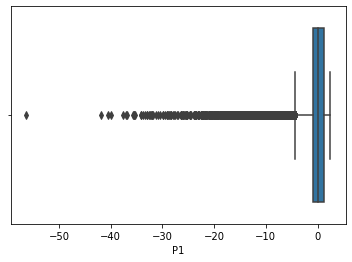

In [11]:
max_thresold = dataset['P1'].quantile(0.99)
print(max_thresold)


min_thresold = dataset['P1'].quantile(0.01)
print(min_thresold)

"""
dataset = dataset[(dataset['P1']<max_thresold) & (dataset['P1']>min_thresold)]
print(dataset[(dataset['P1']<max_thresold) & (dataset['P1']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P1"])

1.8059130689999998
-1.9744760289999999


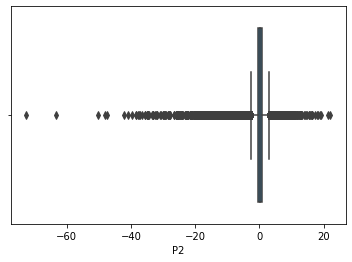

In [12]:
max_thresold = dataset['P2'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P2'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P2']<max_thresold) & (dataset['P2']>min_thresold)]
print(dataset[(dataset['P2']<max_thresold) & (dataset['P2']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P2"])

2.0603833853999993
-2.3914704847999997


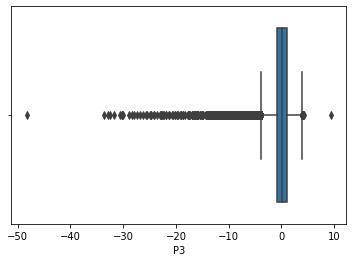

In [13]:
max_thresold = dataset['P3'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P3'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P3']<max_thresold) & (dataset['P3']>min_thresold)]
print(dataset[(dataset['P3']<max_thresold) & (dataset['P3']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P3"])

1.0485980213999992
-0.8507066254


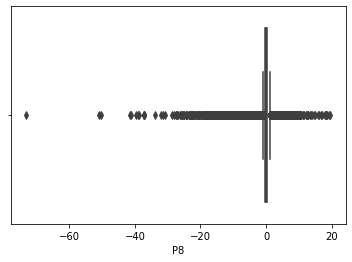

In [14]:
max_thresold = dataset['P8'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P8'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P8']<max_thresold) & (dataset['P8']>min_thresold)]
print(dataset[(dataset['P8']<max_thresold) & (dataset['P8']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P8"])

0.5401274583999993
-0.5036268145999999


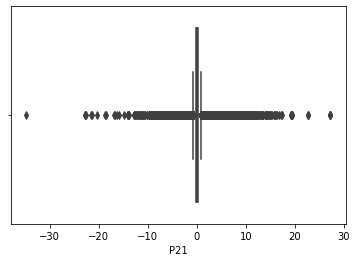

In [15]:
max_thresold = dataset['P21'].quantile(0.95)
print(max_thresold)


min_thresold = dataset['P21'].quantile(0.05)
print(min_thresold)

"""
dataset = dataset[(dataset['P21']<max_thresold) & (dataset['P21']>min_thresold)]
print(dataset[(dataset['P21']<max_thresold) & (dataset['P21']>min_thresold)]["Class"].sum())
"""

sns.boxplot(x=dataset["P21"])

#### After removing the outliers with 5-95 quantile range we are losing the minority class variables which is a big loss for training the model. So we decided not to remove any outliers.  

In [16]:
#dataset.describe()

### Plotting the correlation visualizations

In [17]:
def plot_corr(df, size=29):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

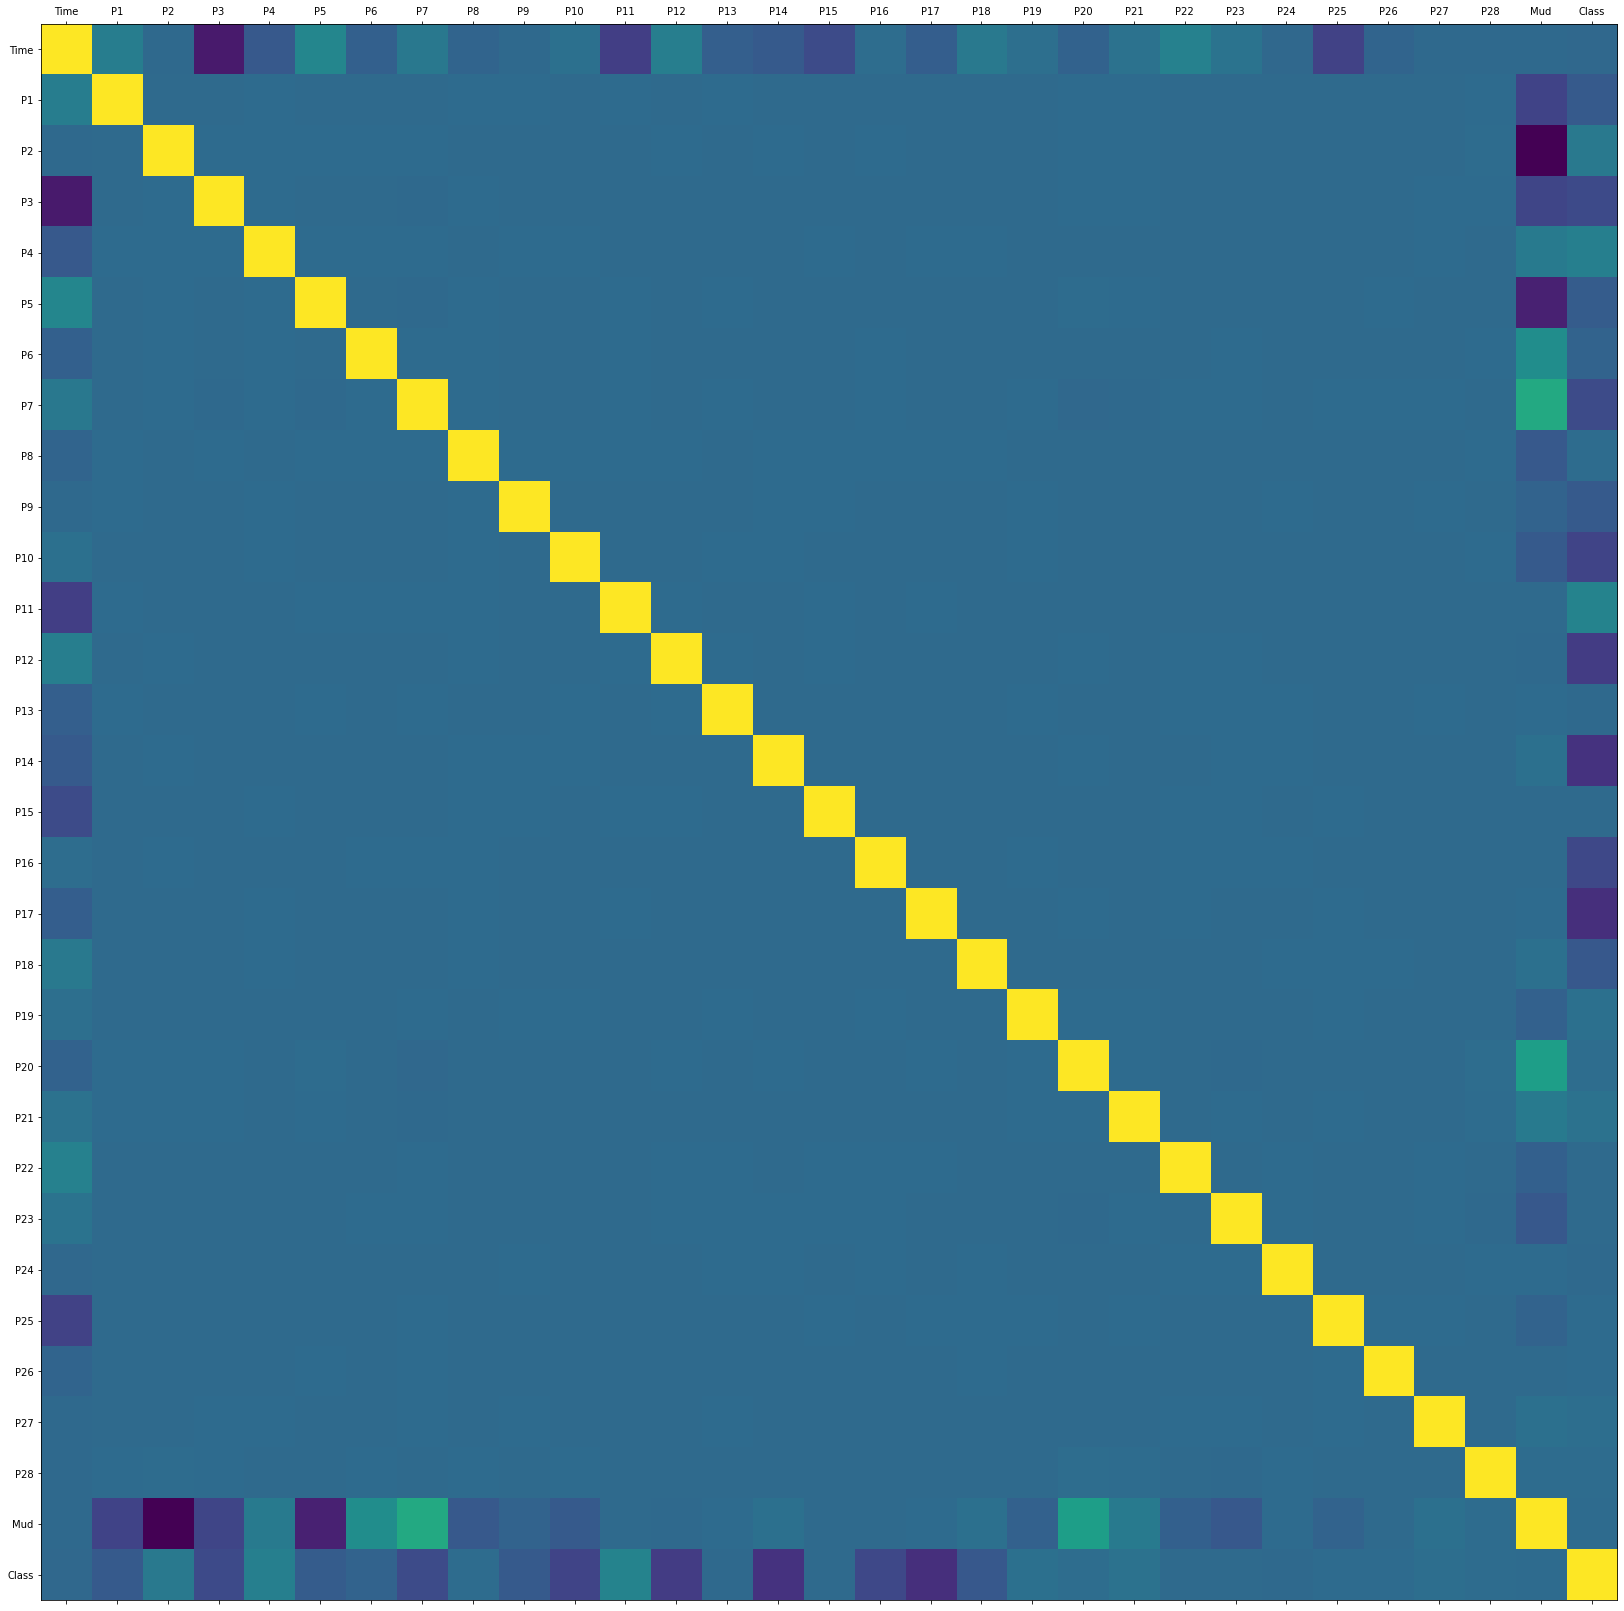

In [18]:
plot_corr(dataset)

### SMOTE (Synthetic minority oversampling technique)

Since we have Class "1" as a minority class we need to oversample the dataset and we need to use the smote technique from imblearn library.

Resource: https://arxiv.org/abs/2003.09788v1

In [19]:
X = dataset.drop('Class',axis='columns')
Y = dataset['Class']

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
x, y = sm.fit_resample(X, Y)

In [20]:
x.shape

(454890, 30)

Splitting with 70-30 ratio

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
"""
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx_train=sc.fit_transform(x_train)\nx_test=sc.transform(x_test)\n'

### Feature Dropping and Feature selection

We tried to drop features which has variance less then 0.1 but there are no such features which we can drop

In [23]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(x_train)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [24]:
x_train.corr()

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P20,P21,P22,P23,P24,P25,P26,P27,P28,Mud
Time,1.000000,0.256176,-0.237554,0.161588,-0.221324,0.306931,0.112518,0.238128,-0.121799,0.180841,...,-0.047126,-0.068923,0.127317,0.049714,-0.005487,-0.214238,-0.069517,-0.179933,-0.011245,0.010324
P1,0.256176,1.000000,-0.798235,0.872568,-0.614683,0.854042,0.289375,0.876785,-0.032106,0.648055,...,-0.268244,-0.071375,0.037044,-0.070389,-0.039128,-0.102786,0.060981,0.128226,0.122979,-0.045319
P2,-0.237554,-0.798235,1.000000,-0.852575,0.673104,-0.779465,-0.254294,-0.851797,-0.088599,-0.676075,...,0.277869,0.149793,-0.097384,0.173098,-0.026557,0.117135,-0.013146,-0.098702,0.025898,-0.237943
P3,0.161588,0.872568,-0.852575,1.000000,-0.782204,0.841539,0.442568,0.883297,-0.129458,0.765017,...,-0.333240,-0.024166,-0.022697,-0.038424,0.035332,-0.101809,-0.015417,0.055394,0.087638,-0.010432
P4,-0.221324,-0.614683,0.673104,-0.782204,1.000000,-0.576200,-0.449980,-0.709995,0.096855,-0.793282,...,0.276696,0.008493,0.095233,0.009771,-0.091059,-0.008104,0.137456,0.018355,-0.040787,-0.000246
P5,0.306931,0.854042,-0.779465,0.841539,-0.576200,1.000000,0.289974,0.828127,-0.177035,0.649432,...,-0.291426,-0.012744,-0.037076,-0.076813,-0.118984,-0.110046,0.059567,0.125711,0.132117,-0.121954
P6,0.112518,0.289375,-0.254294,0.442568,-0.449980,0.289974,1.000000,0.255104,-0.584782,0.400541,...,-0.163526,0.136779,-0.120336,0.348905,-0.030286,-0.129844,-0.061298,-0.149518,-0.015696,0.166827
P7,0.238128,0.876785,-0.851797,0.883297,-0.709995,0.828127,0.255104,1.000000,0.136496,0.749689,...,-0.332204,-0.078655,-0.016029,-0.128210,-0.009904,0.025650,0.031437,0.170623,0.101261,0.128398
P8,-0.121799,-0.032106,-0.088599,-0.129458,0.096855,-0.177035,-0.584782,0.136496,1.000000,-0.100186,...,0.069194,-0.327658,0.234234,-0.500499,0.108887,0.206299,0.066691,0.229215,-0.065166,0.024411
P9,0.180841,0.648055,-0.676075,0.765017,-0.793282,0.649432,0.400541,0.749689,-0.100186,1.000000,...,-0.371855,0.122937,-0.211067,-0.021972,0.014883,-0.018187,-0.113421,0.077315,0.128546,0.024623


Plotting the correlation heatmap after smote analysis

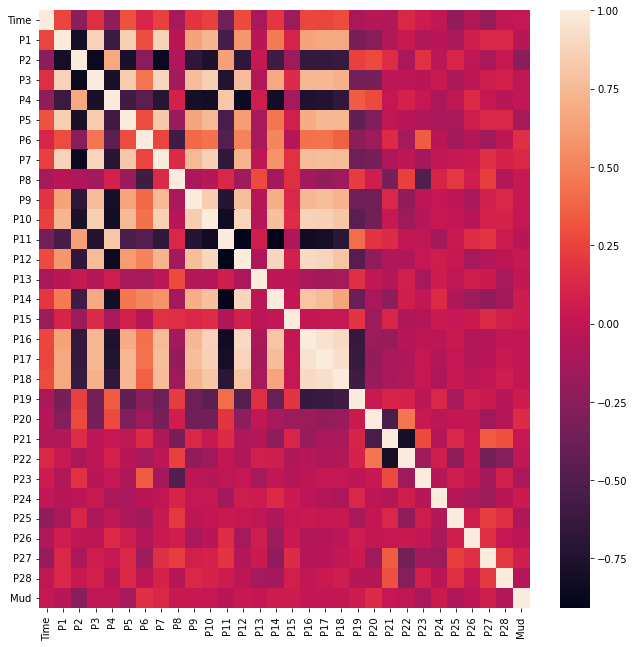

In [25]:
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

### Dropping the features which has high correlation

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))
print(corr_features)

{'P12', 'P18', 'P16', 'P17'}


In [28]:
x_train = x_train.drop(['Time','P12','P17','P18'], axis=1)
x_test = x_test.drop(['Time','P12','P17','P18'], axis=1)

Here, I'm dropping time also as there is no use of using time as a feature for predicting the quality of water

In [29]:
x_train.shape

(318423, 26)

In [30]:
"""
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx_train=sc.fit_transform(x_train)\nx_test=sc.transform(x_test)\n'

### Modeling

In [31]:
#f1scorelgbm=0.999487
#f1scoredecisiontree=0.998453


# from sklearn.tree import DecisionTreeClassifier
# classifier=DecisionTreeClassifier(criterion='entropy')
# classifier.fit(x_train,y_train)

"""
from xgboost import XGBClassifier

classifier=XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
classifier.fit(x_train,y_train)
"""



"""
from lightgbm import LGBMClassifier
classifier=LGBMClassifier()
classifier.fit(x_train,y_train)
"""


from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='entropy',n_estimators=150)
classifier.fit(x_train,y_train)



"""
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=32,epochs=20)

y_pred=ann.predict(x_test)
y_pred=(y_pred>=0.5)

from sklearn.metrics import f1_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
f1_score(y_test,y_pred)
"""



"\nimport tensorflow as tf\nann=tf.keras.models.Sequential()\nann.add(tf.keras.layers.Dense(units=128,activation='relu'))\nann.add(tf.keras.layers.Dense(units=128,activation='relu'))\nann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))\n\nann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])\nann.fit(x_train,y_train,batch_size=32,epochs=20)\n\ny_pred=ann.predict(x_test)\ny_pred=(y_pred>=0.5)\n\nfrom sklearn.metrics import f1_score,confusion_matrix\ncm=confusion_matrix(y_test,y_pred)\nprint(cm)\nf1_score(y_test,y_pred)\n"

In [32]:
"""
from sklearn.svm import SVC

classfier = SVC(kernel = "rbf", random_state = 43)
classfier.fit(x_train,y_train)
"""

'\nfrom sklearn.svm import SVC\n\nclassfier = SVC(kernel = "rbf", random_state = 43)\nclassfier.fit(x_train,y_train)\n'

In [33]:
y_pred=classifier.predict(x_test)

In [34]:
from sklearn.metrics import f1_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
f1_score(y_test,y_pred,average='macro')

[[68401    19]
 [    0 68047]]


0.9998607712644664

In [36]:
import pickle
# open a file, where you ant to store the data
filename = 'Random_forest_150_XYZ.pkl'
pickle.dump(classifier,open(filename,'wb'))

# dump information to that file
pickle.load(open(filename,'rb'))

RandomForestClassifier(criterion='entropy', n_estimators=150)